# PRIMERA ENTREGA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
import re, nltk

%matplotlib inline

In [2]:
d = pd.read_csv("../data/data_desbalanceado.csv")
print( d.shape)
d.head(15)

(24783, 7)


,Unnamed: 0,count,hate_speech,offensive_language,neither,clase,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [3]:
hateSpeech = d[d.clase == 0].shape[0]
off = d[d.clase == 1].shape[0]
net = d[d.clase == 2].shape[0]
print("Hate Speech", hateSpeech,"\nOffensive", off, "\nNeither", net)

Hate Speech 1430 
Offensive 19190 
Neither 4163


In [9]:
d.shape 

(24783, 7)

In [10]:
d.reindex(np.random.permutation(d.index),).head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,clase,tweet
711,722,3,0,3,0,1,#FreshmanAdvice and if you ain't a hoe get up out my traphouseeeeeeee
1678,1713,3,0,3,0,1,&#8220;@_hellMEL: Men hop in they feelings much quicker than women.&#8221; Not me &#128520; I hop in ya bitch
22327,22798,3,1,2,0,1,"Tyra Banks still getting paid for these America's next top model re runs, this bitch so bossy &#128096;&#128091;"
15547,15912,6,0,6,0,1,RT @Huntermoore: RETWEET if you fucked someone's bitch
21739,22203,3,0,3,0,1,These bitches smell like fish &#128557;


# Preprocessing the data

In [11]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to /home/liceth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/liceth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
stop_words= set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

clean1 = d["tweet"].str.replace((r'@[\w]*'), '')
clean2 = clean1.str.replace(r'RT', '')
cleanTweets = clean2.str.replace(r'[^a-zA-Z +^'']', '')
cleanTweets[0]

'   As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out'

In [13]:
tokens = []
for i in cleanTweets:
    tokens.append(nltk.word_tokenize(i))
d["preprocessed"] = tokens
tokens[3]

['she', 'look', 'like', 'a', 'tranny']

In [14]:
pd.set_option('display.max_colwidth', -1)
d.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,clase,tweet,preprocessed
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,"[As, a, woman, you, shouldnt, complain, about, cleaning, up, your, house, amp, as, a, man, you, should, always, take, the, trash, out]"
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,"[boy, dats, coldtyga, dwn, bad, for, cuffin, dat, hoe, in, the, st, place]"
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,"[Dawg, You, ever, fuck, a, bitch, and, she, start, to, cry, You, be, confused, as, shit]"
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,"[she, look, like, a, tranny]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,"[The, shit, you, hear, about, me, might, be, true, or, it, might, be, faker, than, the, bitch, who, told, it, to, ya]"


# First Classifier

In [15]:
import numpy as np
from scipy.sparse import hstack

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [16]:
count_vectorizer.fit_transform(["she look like a tranny"])
print(count_vectorizer.get_feature_names())

['like', 'like tranny', 'look', 'look like', 'she', 'she look', 'tranny']


In [17]:
vectorized_data = count_vectorizer.fit_transform(cleanTweets)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [19]:
from sklearn.model_selection import train_test_split
targets = d["clase"]
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [19]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(probability=True, kernel='linear'))


In [20]:
clf_output = clf.fit(data_train, targets_train)

In [21]:
clf.score(data_test, targets_test)

0.8884405890659673

In [22]:
pred2=clf.predict(data_test)

In [23]:
indx = np.random.randint(d.shape[0], size=10)
rand = []
clases = []
for i in indx:
    rand.append(cleanTweets[i])
    clases.append(d['clase'][i])
print rand

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(rand)? (<ipython-input-23-127b674050b1>, line 7)

In [72]:
try_tweets = count_vectorizer.transform(rand)
pred = clf.predict_proba(try_tweets)
np.set_printoptions(suppress=True)
pred

array([[ 0.07754443,  0.91130105,  0.01115452],
       [ 0.0592772 ,  0.93523471,  0.00548809],
       [ 0.06958255,  0.91159869,  0.01881875],
       [ 0.0573986 ,  0.94198261,  0.00061879],
       [ 0.04581785,  0.94940808,  0.00477407],
       [ 0.05382101,  0.13158391,  0.81459509],
       [ 0.07279834,  0.88137756,  0.0458241 ],
       [ 0.06123097,  0.84299482,  0.09577422],
       [ 0.02895034,  0.13966072,  0.83138895],
       [ 0.06790659,  0.92861293,  0.00348047]])

In [97]:
targets_predic2= pd.Series(pred2)

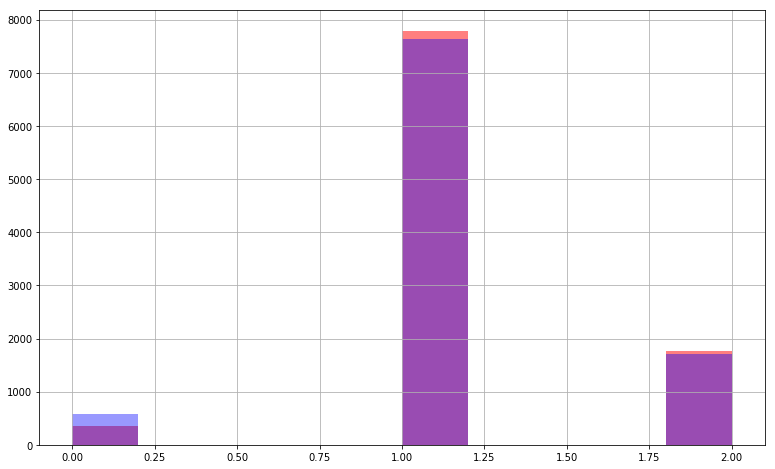

In [117]:
plt.figure(figsize=(13, 8))
targets_predic2.hist(alpha=0.5, color='r')
targets_test.hist(alpha=0.4, color='b')


plt.show()

In [21]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [22]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [25]:
text_clf=MultinomialNB(fit_prior=True,class_prior=[0.774, 0.167,0.057])
s = cross_val_score(text_clf,indexed_data,targets, cv=KFold(15,shuffle=True) , scoring=make_scorer(accuracy_score))
print("accuracy %.4f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(text_clf,indexed_data,targets, cv=KFold(15,shuffle=True), scoring=tpr)
print("tpr      %.4f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(text_clf,indexed_data,targets, cv=KFold(15,shuffle=True), scoring=tnr)
print("tnr      %.4f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.7427 (+/- 0.00859)
tpr      0.8974 (+/- 0.00970)
tnr      0.1067 (+/- 0.04008)
